<a href="https://colab.research.google.com/github/ByungHyunPark57/Project_ORI-Team_drive_insurance/blob/main/EDA/PBH_EDA_%EC%9A%B4%EC%A0%84%EB%B3%B4%ED%97%98_%EA%B5%90%EC%B0%A8%ED%8C%90%EB%A7%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/보험 판매예측 데이터 파일/train.csv")
test = pd.read_csv("/content/drive/MyDrive/보험 판매예측 데이터 파일/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/보험 판매예측 데이터 파일/sample_submission.csv")

In [ ]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [ ]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [ ]:
train.loc[[75671],:]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
75671,75671,Female,27,1,15.0,0,< 1 Year,No,36238.0,152.0,242,0


In [ ]:
test.loc[[129734],:]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
129734,11634532,Male,47,1,48.0,1,1-2 Year,No,2630.0,124.0,37


EDA ↓

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [ ]:
train = train.drop(columns=['id'])

In [ ]:
train.loc[ train['Age'] <= 26, 'Age'] = 0
train.loc[(train['Age'] > 26) & (train['Age'] <= 36), 'Age'] = 1
train.loc[(train['Age'] > 36) & (train['Age'] <= 49), 'Age'] = 2
train.loc[(train['Age'] > 49) & (train['Age'] <= 60), 'Age'] = 3
train.loc[ train['Age'] > 60, 'Age'] = 4

test.loc[ test['Age'] <= 26, 'Age'] = 0
test.loc[(test['Age'] > 26) & (test['Age'] <= 36), 'Age'] = 1
test.loc[(test['Age'] > 36) & (test['Age'] <= 49), 'Age'] = 2
test.loc[(test['Age'] > 49) & (test['Age'] <= 60), 'Age'] = 3
test.loc[ test['Age'] > 60, 'Age'] = 4

In [ ]:
train['Gender']= train['Gender'].map({'Male':1,'Female':0})

채널도 인코딩 해봄

In [ ]:
train.loc[ train['Policy_Sales_Channel'] == 26, 'Policy_Sales_Channel'] = 26
train.loc[ train['Policy_Sales_Channel'] == 124, 'Policy_Sales_Channel'] = 124
train.loc[ train['Policy_Sales_Channel'] == 152, 'Policy_Sales_Channel'] = 152
train.loc[~train['Policy_Sales_Channel'].isin([26, 124, 152]), 'Policy_Sales_Channel'] = 0

test.loc[ test['Policy_Sales_Channel'] == 26, 'Policy_Sales_Channel'] = 26
test.loc[ test['Policy_Sales_Channel'] == 124, 'Policy_Sales_Channel'] = 124
test.loc[ test['Policy_Sales_Channel'] == 152, 'Policy_Sales_Channel'] = 152
test.loc[ test['Policy_Sales_Channel'] >= 153, 'Policy_Sales_Channel'] = 00

In [ ]:
train['Region_Code']=train['Region_Code'].astype(int)
train['Annual_Premium']=train['Annual_Premium'].astype(int)
train['Policy_Sales_Channel']=train['Policy_Sales_Channel'].astype(int)

In [ ]:
train['Vehicle_Damage']= train['Vehicle_Damage'].map({'Yes':1,'No':0})

In [ ]:
train['Vehicle_Damage'] = train['Vehicle_Damage'].astype(int)

In [ ]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,1,35,0,1-2 Year,1,65101,124,187,0
1,1,2,1,28,0,> 2 Years,1,58911,26,288,1
2,0,0,1,14,1,< 1 Year,0,38043,152,254,0
3,0,1,1,1,0,1-2 Year,1,2630,0,76,0
4,0,1,1,15,1,1-2 Year,0,31951,152,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,1,2,1,6,0,1-2 Year,1,27412,26,218,0
11504794,0,0,1,36,0,< 1 Year,1,29509,152,115,1
11504795,0,1,1,32,1,< 1 Year,0,2630,152,189,0
11504796,0,3,1,28,0,1-2 Year,1,48443,26,274,1


In [ ]:
train['Vehicle_Age'].unique()

array(['1-2 Year', '> 2 Years', '< 1 Year'], dtype=object)

In [ ]:
train['Vehicle_Age'] = train['Vehicle_Age'].map({'1-2 Year':1,'> 2 Years':2,'< 1 Year':0})

Vintage(보험계약연령)이 숫자가 왜이리 큰지 모르겠음

In [ ]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,1,35,0,1-2 Year,1,65101,124,187,0
1,1,2,1,28,0,> 2 Years,1,58911,26,288,1
2,0,0,1,14,1,< 1 Year,0,38043,152,254,0
3,0,1,1,1,0,1-2 Year,1,2630,0,76,0
4,0,1,1,15,1,1-2 Year,0,31951,152,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,1,2,1,6,0,1-2 Year,1,27412,26,218,0
11504794,0,0,1,36,0,< 1 Year,1,29509,152,115,1
11504795,0,1,1,32,1,< 1 Year,0,2630,152,189,0
11504796,0,3,1,28,0,1-2 Year,1,48443,26,274,1


모두 정수형으로 변환

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype
---  ------                -----
 0   Gender                int64
 1   Age                   int64
 2   Driving_License       int64
 3   Region_Code           int64
 4   Previously_Insured    int64
 5   Vehicle_Age           int64
 6   Vehicle_Damage        int64
 7   Annual_Premium        int64
 8   Policy_Sales_Channel  int64
 9   Vintage               int64
 10  Response              int64
dtypes: int64(11)
memory usage: 965.5 MB


결측값은 없음 ↓

In [ ]:
train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

중복값은 없음 ↓

In [ ]:
train.duplicated().sum()

0

test도 똑같이 ↓

In [ ]:
test['Gender']= test['Gender'].map({'Male':1,'Female':0})

In [ ]:
test['Region_Code']=test['Region_Code'].astype(int)
test['Annual_Premium']=test['Annual_Premium'].astype(int)
test['Policy_Sales_Channel']=test['Policy_Sales_Channel'].astype(int)

In [ ]:
test['Vehicle_Damage']= test['Vehicle_Damage'].map({'Yes':1,'No':0})

In [ ]:
test['Vehicle_Damage'] = test['Vehicle_Damage'].astype(int)

In [ ]:
test['Vehicle_Age'] = test['Vehicle_Age'].map({'1-2 Year':1,'> 2 Years':2,'< 1 Year':0})

In [ ]:
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,0,0,1,47,0,0,0,2630,0,228
1,11504799,1,2,1,28,0,1,1,37483,124,123
2,11504800,1,2,1,43,0,1,1,2630,26,271
3,11504801,0,0,1,47,1,0,0,24502,152,115
4,11504802,1,3,1,19,0,1,0,34115,124,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,1,3,1,28,0,1,1,51661,124,109
7669862,19174660,1,1,1,50,1,0,0,25651,152,184
7669863,19174661,1,2,1,33,1,1,0,2630,138,63
7669864,19174662,1,1,1,28,0,0,1,38866,124,119


In [ ]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [ ]:
test.duplicated().sum()

0

이상치는 Annual_Premium 제외하고는 없어보임 처리는 어떻게 할지 ↓

<Axes: ylabel='Annual_Premium'>

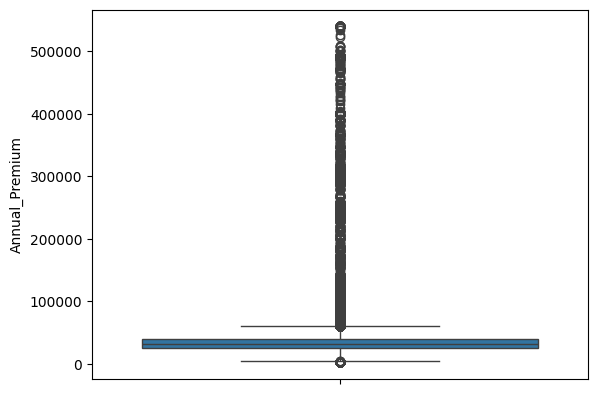

In [ ]:
sns.boxplot(train['Annual_Premium'])

In [ ]:
train.Annual_Premium = train.Annual_Premium/abs(train.Annual_Premium.max())
train.Policy_Sales_Channel = train.Policy_Sales_Channel/abs(train.Policy_Sales_Channel.max())
train.Vintage = train.Vintage/abs(train.Vintage.max())

test.Annual_Premium = test.Annual_Premium/abs(test.Annual_Premium.max())
test.Policy_Sales_Channel = test.Policy_Sales_Channel/abs(test.Policy_Sales_Channel.max())
test.Vintage = test.Vintage/abs(test.Vintage.max())

In [ ]:
train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,1,35,0,1,1,0.120521,0.815789,0.625418,0
1,1,2,1,28,0,2,1,0.109061,0.171053,0.963211,1
2,0,0,1,14,1,0,0,0.070428,1.000000,0.849498,0
3,0,1,1,1,0,1,1,0.004869,0.000000,0.254181,0
4,0,1,1,15,1,1,0,0.059150,1.000000,0.983278,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,1,2,1,6,0,1,1,0.050747,0.171053,0.729097,0
11504794,0,0,1,36,0,0,1,0.054630,1.000000,0.384615,1
11504795,0,1,1,32,1,0,0,0.004869,1.000000,0.632107,0
11504796,0,3,1,28,0,1,1,0.089682,0.171053,0.916388,1


모델링 간단히 ↓

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X, Y = train.drop(columns = ['Response']) , train['Response']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y,test_size=0.2, random_state=123)

In [ ]:
xgb  = XGBClassifier()
xgb.fit(X_train, Y_train)

Y_pred = xgb.predict(X_test)

xgb.score(X_train, Y_train)

0.8797328896923219

변수들간의 상관계수 확인 ↓

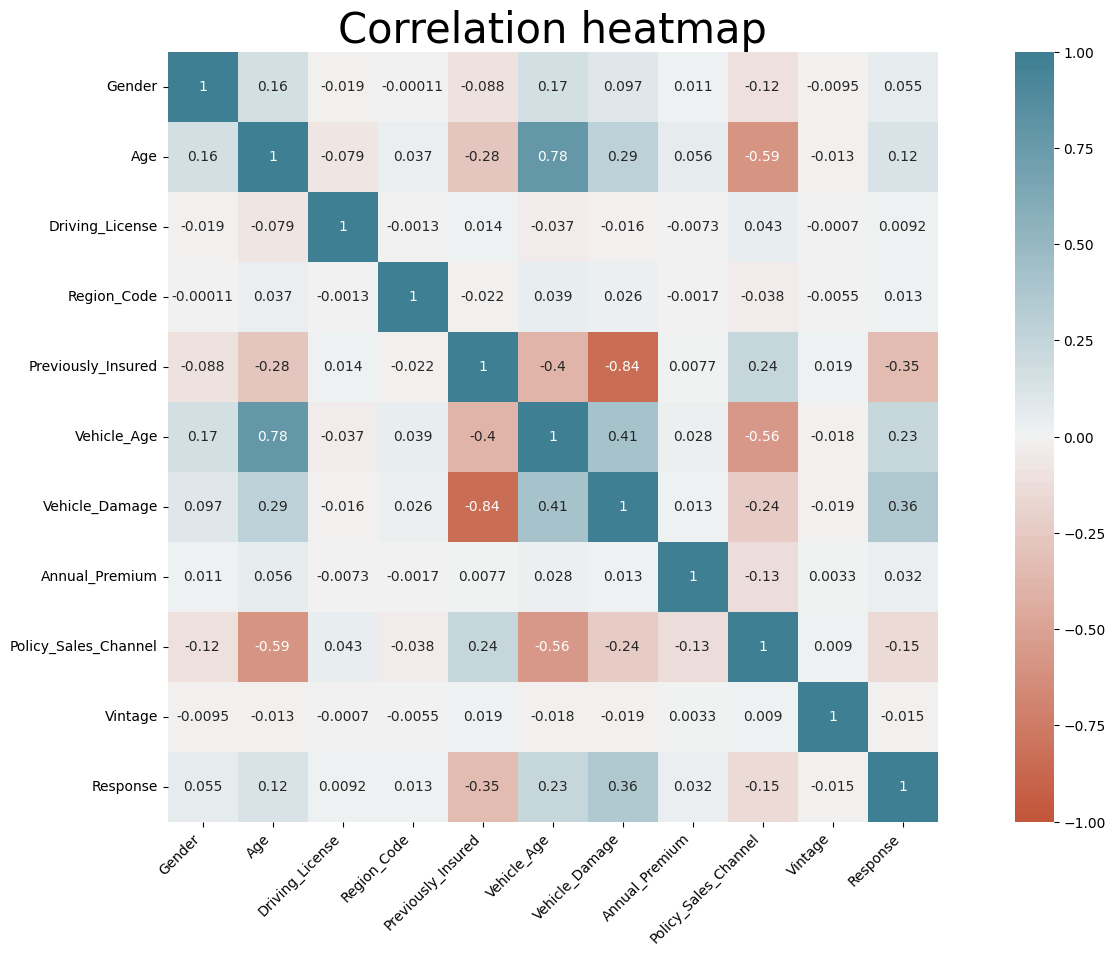

In [ ]:
train_number = train.select_dtypes(np.number)

corr = train_number.corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title('Correlation heatmap', fontsize=30)
plt.show()

상관계수 높은 변수들 정리 ↓

상관계수 -0.28 : Age - Previously_Insured ~~ 나이가 많을 수록 이전에 보험을 가입한 비율이 높을 것이라고 생각하는데 오히려 더 낮음

상관계수 0.78 : Age - Vehicle_Age ~~ 나이가 많을수록 차량의 연식도 오래 됨


상관계수 0.29 : Age - Vehicle_Damage ~~ 나이가 많을수록 차량의 손상이 있는 비율이 높다

상관계수 -0.59 : Age - Policy Sales Channel ~~ 나이가 많을수록 채널 숫자?가 작아짐

상관계수 -0.4 : Previously_Insured - Vehicle_Age ~~ 이전에 보험에 가입했으면 연식이 더 최신

상관계수 -0.84 : Previously_Insured - Vehicle_Damage ~~ 이전에 보험에 가입했으면 차량 손상인 비율이 낮다

상관계수 0.24 : Previously_Insured - Policy Sales Channel ~~ 이전에 보험에 가입했으면 채널 숫자?가 커짐

상관계수 -0.35 : Previously_Insured - Response ~~ 이전에 보험에 가입했으면 만족 비율이 낮다

상관계수 0.41 : Vehicle_Age - Vehicle_Damage ~~ 차량 연식이 오래될수록 손상된 비율이 높다

상관계수 -0.56 : Vehicle_Age - Policy Sales Channel ~~ 차량 연식이 오래될수록 채널숫자?가 작아짐

상관계수 0.23 : Vehicle_Age - Response ~~ 차량 연식이 오래될수록 만족하는 비율이 높다

상관계수 -0.24 : Vehicle_Damage - Policy Sales Channel ~~ 차량 손상 비율이 높을수록 채널숫자?가 작아짐

상관계수 0.36 : Vehicle_Damage - Response ~~ 차량 손상 비율이 높을수록 만족 비율이 높아짐

 나이랑 다른 변수들 시각화 ↓

상관계수 0.056 : Age - Annual_Premium ~~ 나이가 많을수록 연간 보험료가 높을 것이다 나이가 많을수록 평균 연간 보험료가 높아지는 것을 볼 수 있다↓

<Axes: xlabel='Age'>

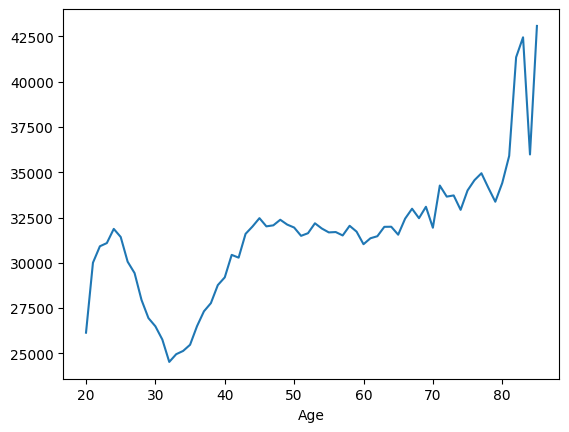

In [ ]:
train.groupby('Age').mean()['Annual_Premium'].plot()

산점도로는 나이가 늘어나도 연간 보험료는 그대로 유지되는 형태로 보임 ↓

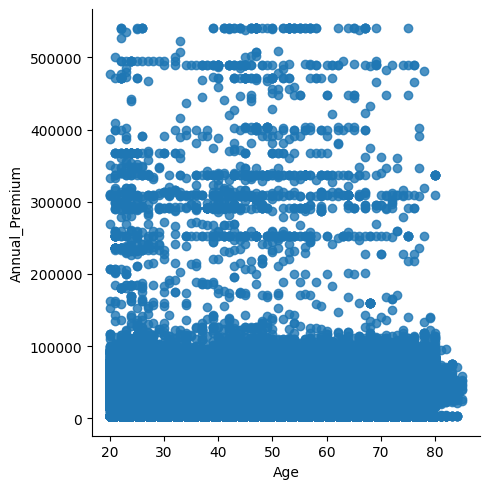

In [ ]:
sns.lmplot(x='Age', y='Annual_Premium', data=train)

상관계수 -0.28 : Age - Previously_Insured ~~ 나이가 많을 수록 이전에 보험을 가입한 비율이 높을 것이라고 생각하는데 오히려 더 낮음 ↓ 20대에 가입자 비율이 많아서 그런것으로 보임

<Axes: xlabel='Age'>

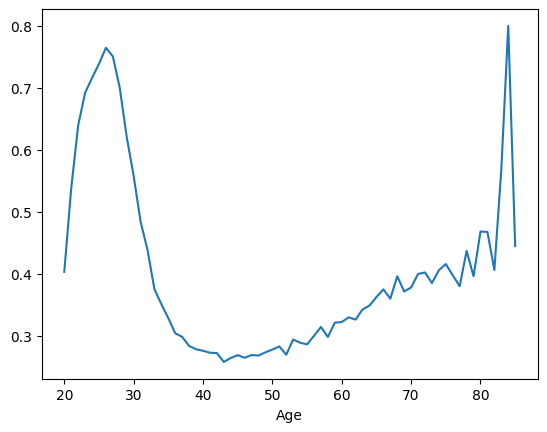

In [ ]:
train.groupby('Age').mean()['Previously_Insured'].plot()

상관계수 -0.59 : Age - Policy Sales Channel ~~ 나이가 많을수록 채널 숫자?가 작아짐

<Axes: xlabel='Age'>

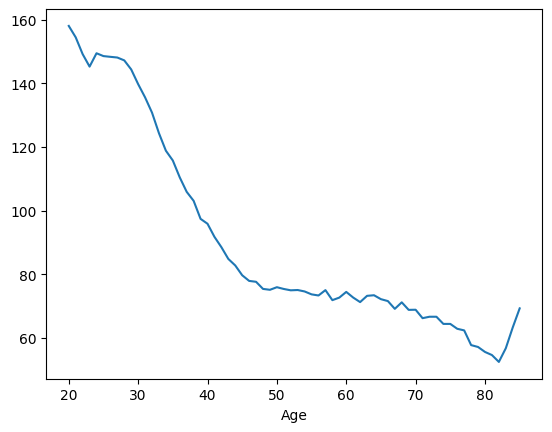

In [ ]:
train.groupby('Age').mean()['Policy_Sales_Channel'].plot()

20~50대는 거의 모두 면허를 소지하고 있고 60대부터는 소지않은 사람이 조금씩 늘어나다 80대 부터는 소지자 비율이 0.6까지 크게 떨어진다 ↓

<Axes: xlabel='Age'>

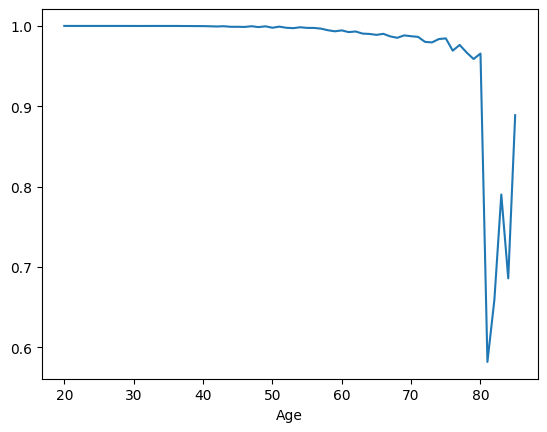

In [ ]:
train.groupby('Age').mean()['Driving_License'].plot()

나이가 많을수록 평균 차량 연식이 높아진다 ↓ 20대는 신형을 많이 타고 30대부터는 어느정도 연식이 있는 차량을 사용하는 것으로 해석 가능

<Axes: xlabel='Age'>

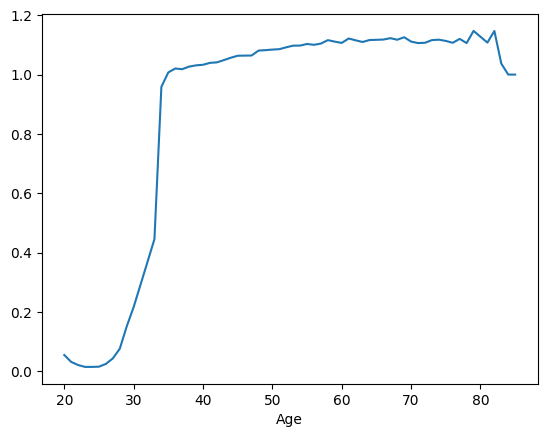

In [ ]:
train.groupby('Age').mean()['Vehicle_Age'].plot()

나이에 따른 차량 손상유무, 20대 중반과 80대 중반엔 차량 손상비율이 매우 낮고 나머지 연령대는 비슷하다 80대 이상은 데이터수가 별로 없어서 이렇게 나오는 것 같음

<Axes: xlabel='Age'>

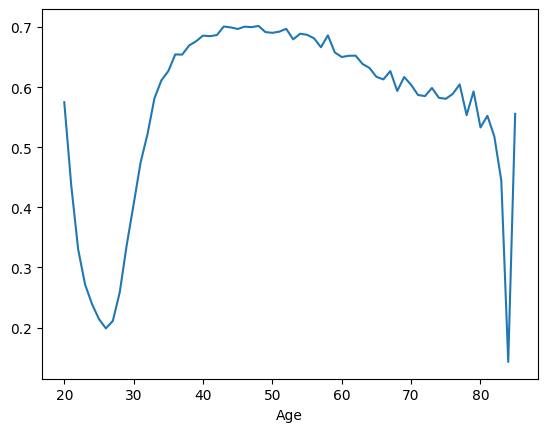

In [ ]:
train.groupby('Age').mean()['Vehicle_Damage'].plot()

나이에 따른 평균 계약연령을 거의 비슷하고 80대 중반에서만 급상승하는데 이것도 데이터가 부족해서 이런 형태인 것 같음 ↓

<Axes: xlabel='Age'>

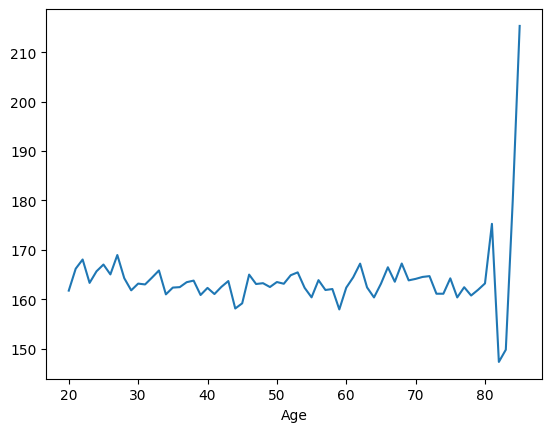

In [ ]:
train.groupby('Age').mean()['Vintage'].plot()

보험 가입여부 나머지변수 시각화 ↓

상관계수 -0.4 : Previously_Insured - Vehicle_Age ~~ 이전에 보험에 가입했으면 연식이 더 최신

<Axes: xlabel='Previously_Insured'>

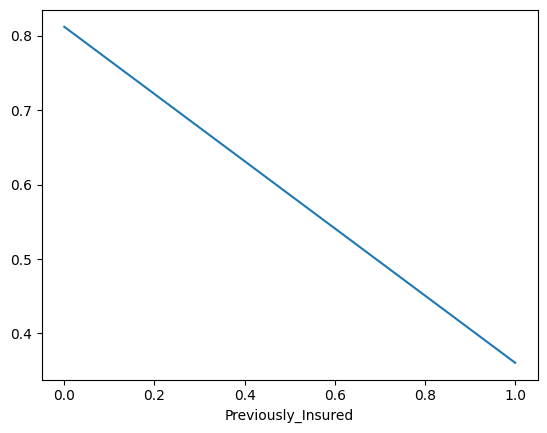

In [ ]:
train.groupby('Previously_Insured').mean()['Vehicle_Age'].plot()

상관계수 -0.84 : Previously_Insured - Vehicle_Damage ~~ 이전에 보험에 가입했으면 차량 손상인 비율이 낮다

<Axes: xlabel='Previously_Insured'>

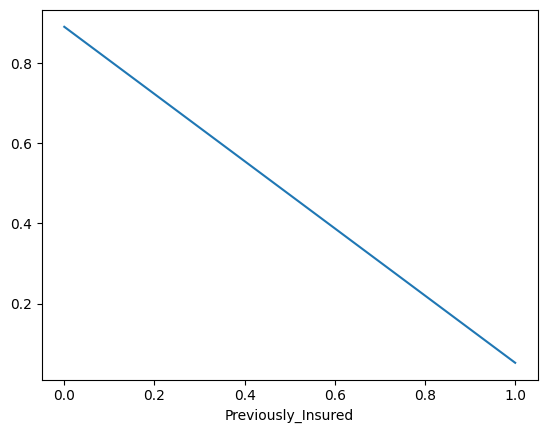

In [ ]:
train.groupby('Previously_Insured').mean()['Vehicle_Damage'].plot()

상관계수 0.24 : Previously_Insured - Policy_Sales_Channel ~~ 이전에 보험에 가입했으면 채널 숫자?가 커짐

<Axes: xlabel='Previously_Insured'>

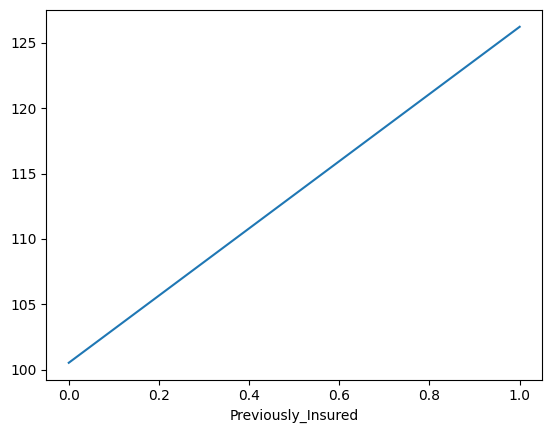

In [ ]:
train.groupby('Previously_Insured').mean()['Policy_Sales_Channel'].plot()

상관계수 -0.35 : Previously_Insured - Response ~~ 이전에 보험에 가입했으면 만족 비율이 낮다

<Axes: xlabel='Previously_Insured'>

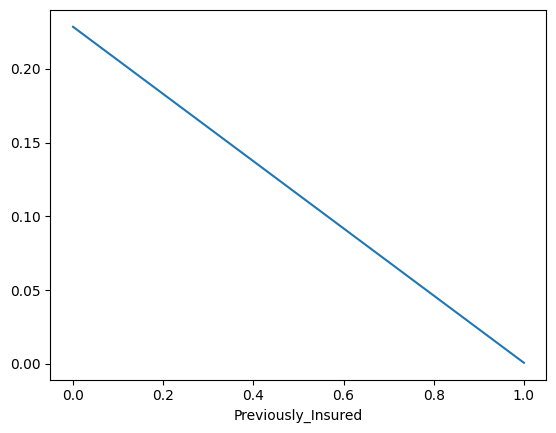

In [ ]:
train.groupby('Previously_Insured').mean()['Response'].plot()

변수들과 평균만족도 ↓

남자 평균만족 0.14, 여자 평균만족 0.105

<Axes: xlabel='Gender'>

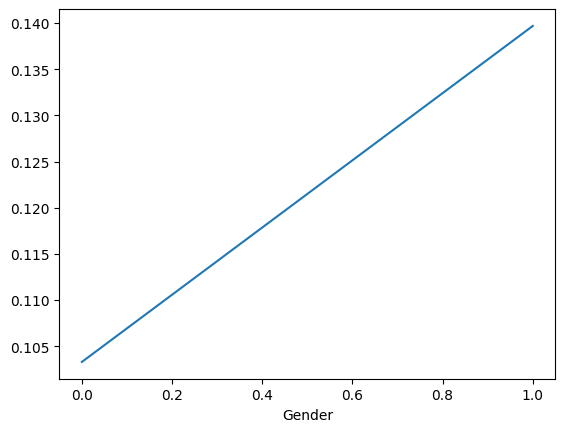

In [ ]:
train.groupby('Gender').mean()['Response'].plot()

30~50대가 만족도 높음

<Axes: xlabel='Age'>

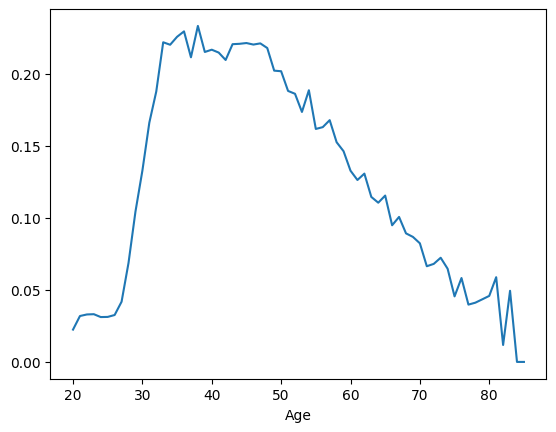

In [ ]:
train.groupby('Age').mean()['Response'].plot()

면허소지 만족도 0.12 먼허미소지 만족도 0.06

<Axes: xlabel='Driving_License'>

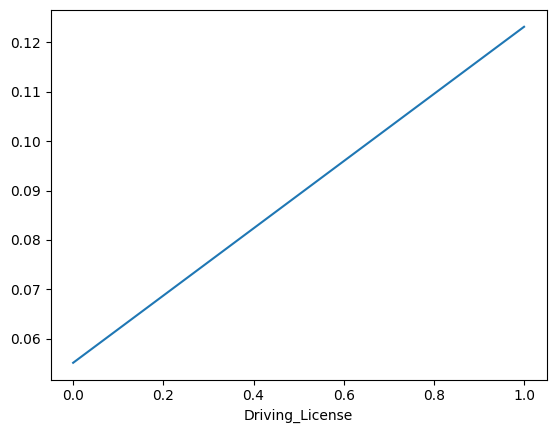

In [ ]:
train.groupby('Driving_License').mean()['Response'].plot()

지역이랑 만족도는 상관없는듯

<Axes: xlabel='Region_Code'>

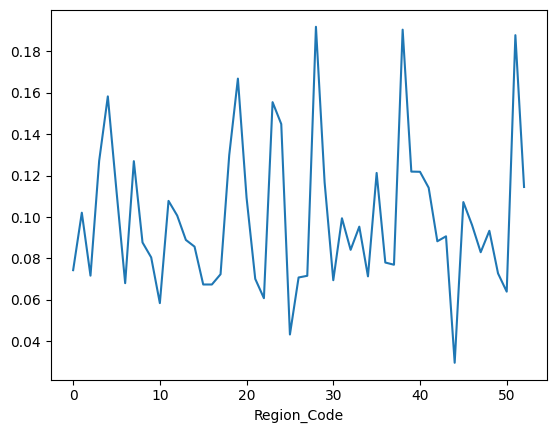

In [ ]:
train.groupby('Region_Code').mean()['Response'].plot()

이전에 보험에 가입했으면 만족도 거의 0?

<Axes: xlabel='Previously_Insured'>

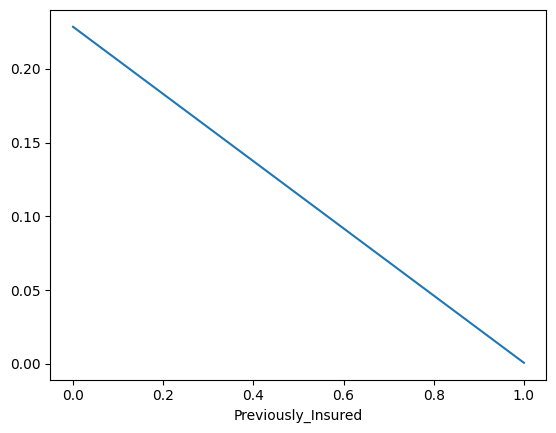

In [ ]:
train.groupby('Previously_Insured').mean()['Response'].plot()

연식 높을수록 만족도 높아짐

<Axes: xlabel='Vehicle_Age'>

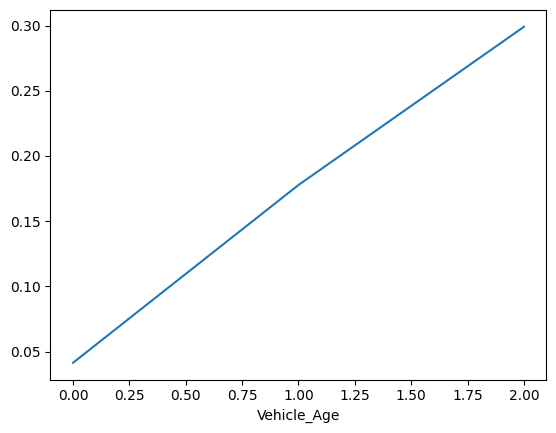

In [ ]:
train.groupby('Vehicle_Age').mean()['Response'].plot()

손상있으면 만족도 0.25 없으면 0?

<Axes: xlabel='Vehicle_Damage'>

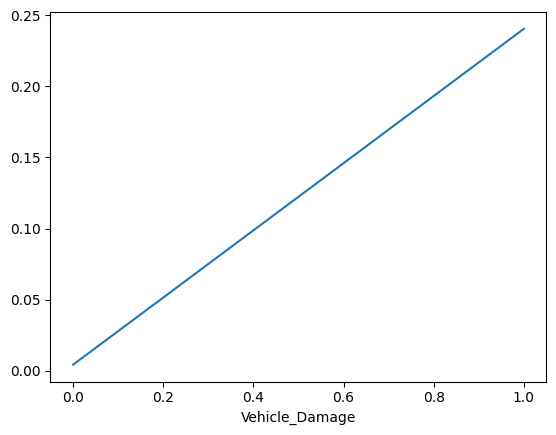

In [ ]:
train.groupby('Vehicle_Damage').mean()['Response'].plot()

아래 3개는 Response와 크게 관련 없어 보임

<Axes: xlabel='Annual_Premium'>

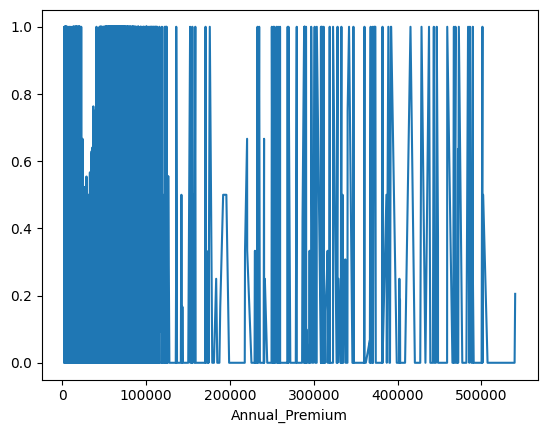

In [ ]:
train.groupby('Annual_Premium').mean()['Response'].plot()

<Axes: xlabel='Policy_Sales_Channel'>

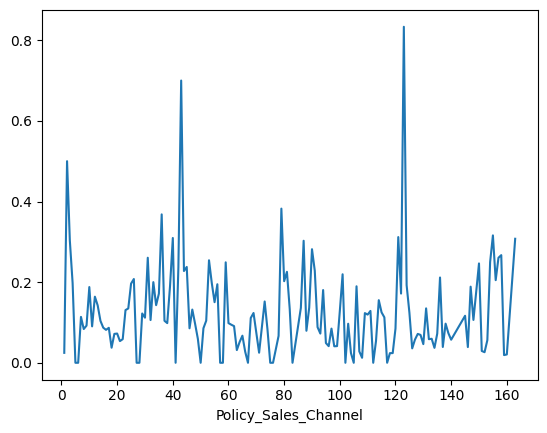

In [ ]:
train.groupby('Policy_Sales_Channel').mean()['Response'].plot()

<Axes: xlabel='Vintage'>

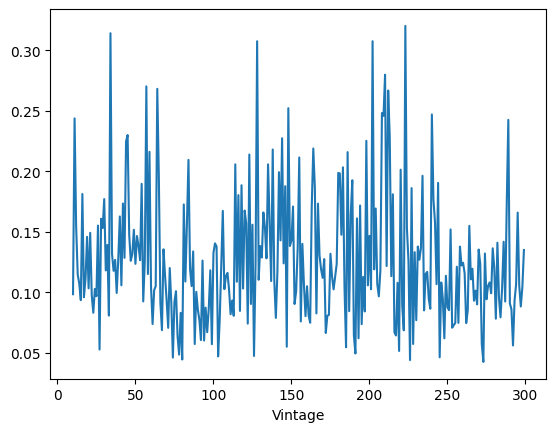

In [ ]:
train.groupby('Vintage').mean()['Response'].plot()

넣으면 괜찮을 것 같은 시각화 ↓

 Age - Annual_Premium ~~ 나이가 많을수록 연간 보험료가 높을 것이다 나이가 많을수록 평균 연간 보험료가 높아지는 것을 볼 수 있다↓

26~36세(1)에서는 평균 연간 보험료가 가장 낮고 0,2 에서는 비슷하고 이후에는 높아짐

<Axes: xlabel='Age'>

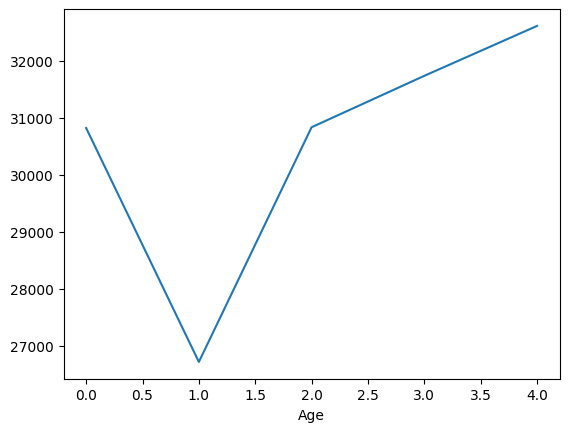

In [ ]:
train.groupby('Age').mean()['Annual_Premium'].plot()

train.loc[ train['Policy_Sales_Channel'] == 26, 'Policy_Sales_Channel'] = 26
train.loc[ train['Policy_Sales_Channel'] == 124, 'Policy_Sales_Channel'] = 124
train.loc[ train['Policy_Sales_Channel'] == 152, 'Policy_Sales_Channel'] = 152
train.loc[~train['Policy_Sales_Channel'].isin([26, 124, 152]), 'Policy_Sales_Channel'] = 0

test.loc[ test['Policy_Sales_Channel'] == 26, 'Policy_Sales_Channel'] = 26
test.loc[ test['Policy_Sales_Channel'] == 124, 'Policy_Sales_Channel'] = 124
test.loc[ test['Policy_Sales_Channel'] == 152, 'Policy_Sales_Channel'] = 152
test.loc[ test['Policy_Sales_Channel'] >= 153, 'Policy_Sales_Channel'] = 0

**26세 이하가 152채널에서 보험계약 많이 맺음** 위텍스트는 채널인코딩한 코드입니다 26, 124, 152가 아닌 채널은 일단 0으로 해놨습니다

<Axes: xlabel='Age', ylabel='count'>

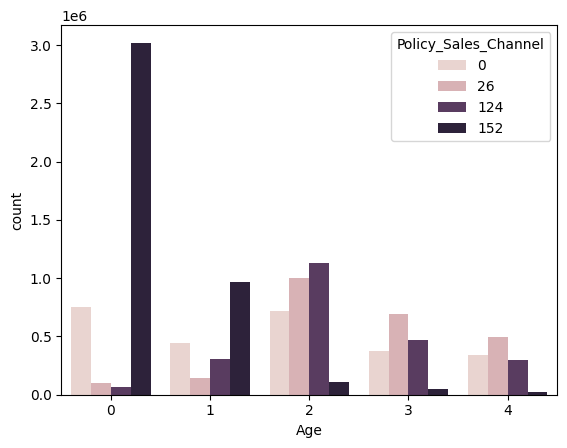

In [ ]:
sns.countplot(data=train, hue='Policy_Sales_Channel', x='Age')

**26세 이하는 거의 연식이 1년이하 36세 이상은 연식1년이하 거의 없음** ↓

<Axes: xlabel='Age', ylabel='count'>

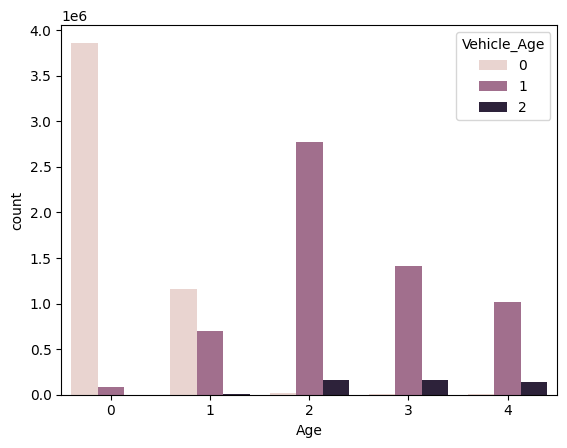

In [ ]:
sns.countplot(data=train, hue='Vehicle_Age', x='Age')

**차량 손상이 없으면 이전에 보험에 가입한 비율이 높음 손상이 있다면 이전에 보험에 가입한 비율이 낮음** ↓

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

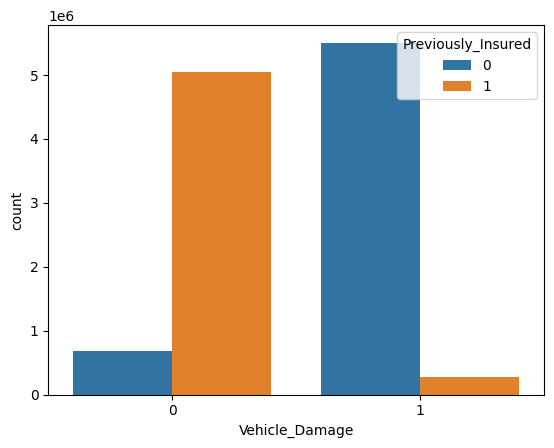

In [ ]:
sns.countplot(data=train, hue='Previously_Insured', x='Vehicle_Damage')

**차량 손상이 없으면 연식이 낮은 비율이 더 높음** ↓

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

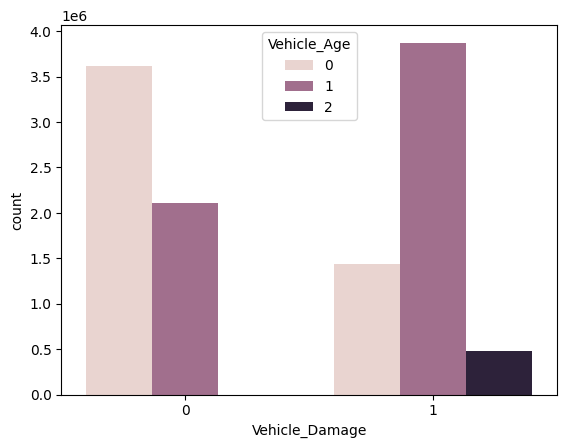

In [ ]:
sns.countplot(data=train, hue='Vehicle_Age', x='Vehicle_Damage')

Response는 민주님이 했던 내용으로 하면 될 것 같습니다

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

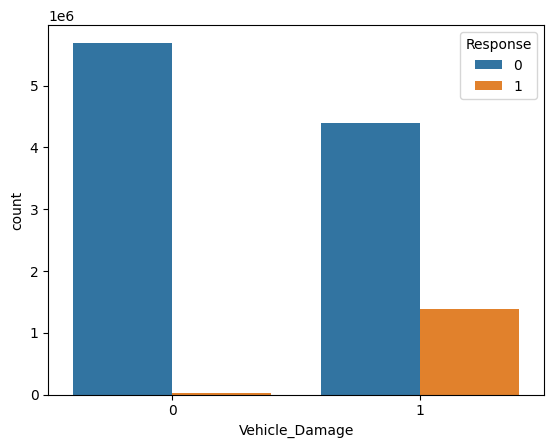

In [ ]:
sns.countplot(data=train, hue='Response', x='Vehicle_Damage')

In [ ]:
train['Region_Code'].unique()

array([35, 28, 14,  1, 15, 47, 45,  8, 11,  3, 10, 12, 37, 50, 30, 46, 29,
       16, 26, 25, 41, 48,  7,  4, 24, 36, 33,  2,  9, 27, 18, 43, 49, 17,
       13, 38,  6, 21, 23,  0, 19,  5, 39, 44, 20, 40, 22, 32, 42, 31, 34,
       51, 52])

<Axes: ylabel='count'>

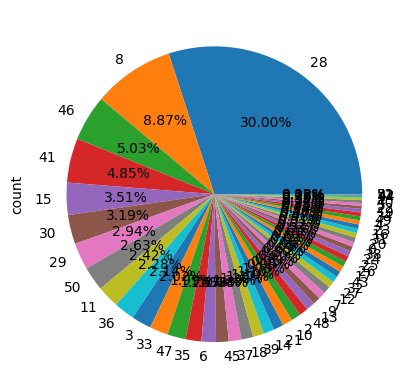

In [ ]:
df = train.Region_Code.value_counts()
df.plot.pie(autopct='%.2f%%')